In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

In [3]:
# Define tickers and fetch data
tickers = ['AAPL', 'GOOGL', 'IBM','AMZN']  
data = []
start_date='2020-01-01'
end_date='2023-01-01'

aapl_data = yf.download('AAPL', start=start_date, end=end_date)
googl_data = yf.download('GOOGL', start=start_date, end=end_date)
IBM_data = yf.download('IBM', start=start_date, end=end_date)
amzn_data = yf.download('AMZN', start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'missing_values': Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64, 'missing_percentage': Price      Ticker
Adj Close  AAPL      0.0
Close      AAPL      0.0
High       AAPL      0.0
Low        AAPL      0.0
Open       AAPL      0.0
Volume     AAPL      0.0
dtype: float64, 'descriptive_stats': Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   756.000000  756.000000  756.000000  756.000000  756.000000   
mean    127.940987  130.311812  131.892775  128.614983  130.231998   
std      30.494847   30.566496   30.841435   30.287325   30.596429   
min      54.509762   56.092499   57.125000   53.152500   57.020000   
25%     112.981407  115.739374  117.275000  114.129997  115.924374   
50%     133.331642  135.379997  137.200005  133.750000  135.794998   
75%     148.579044  150.

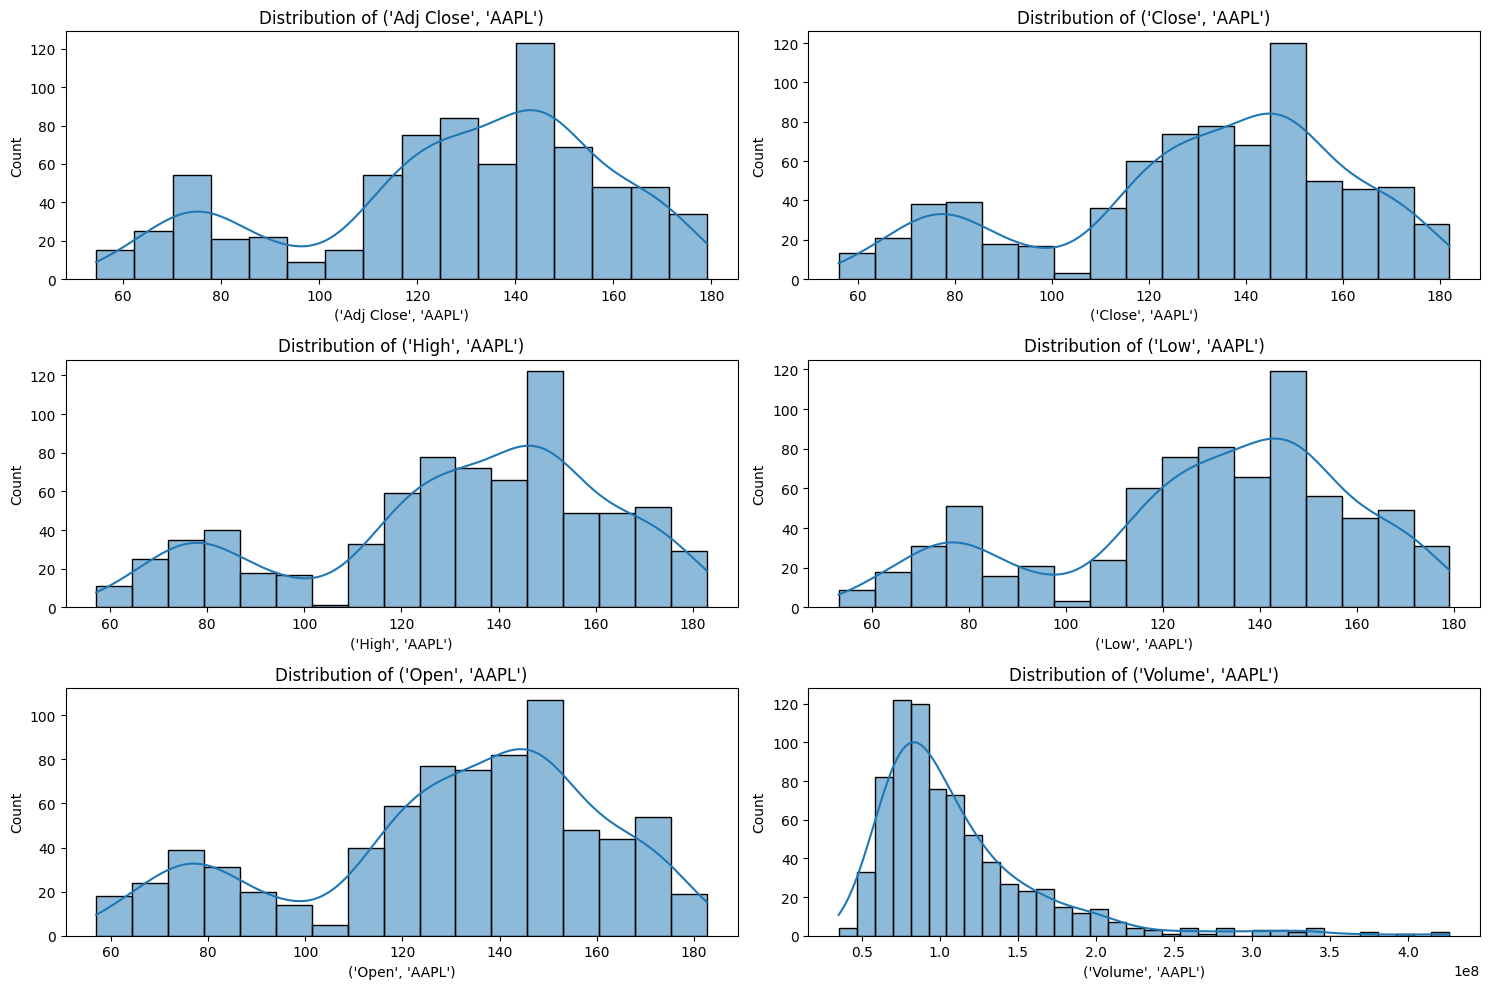

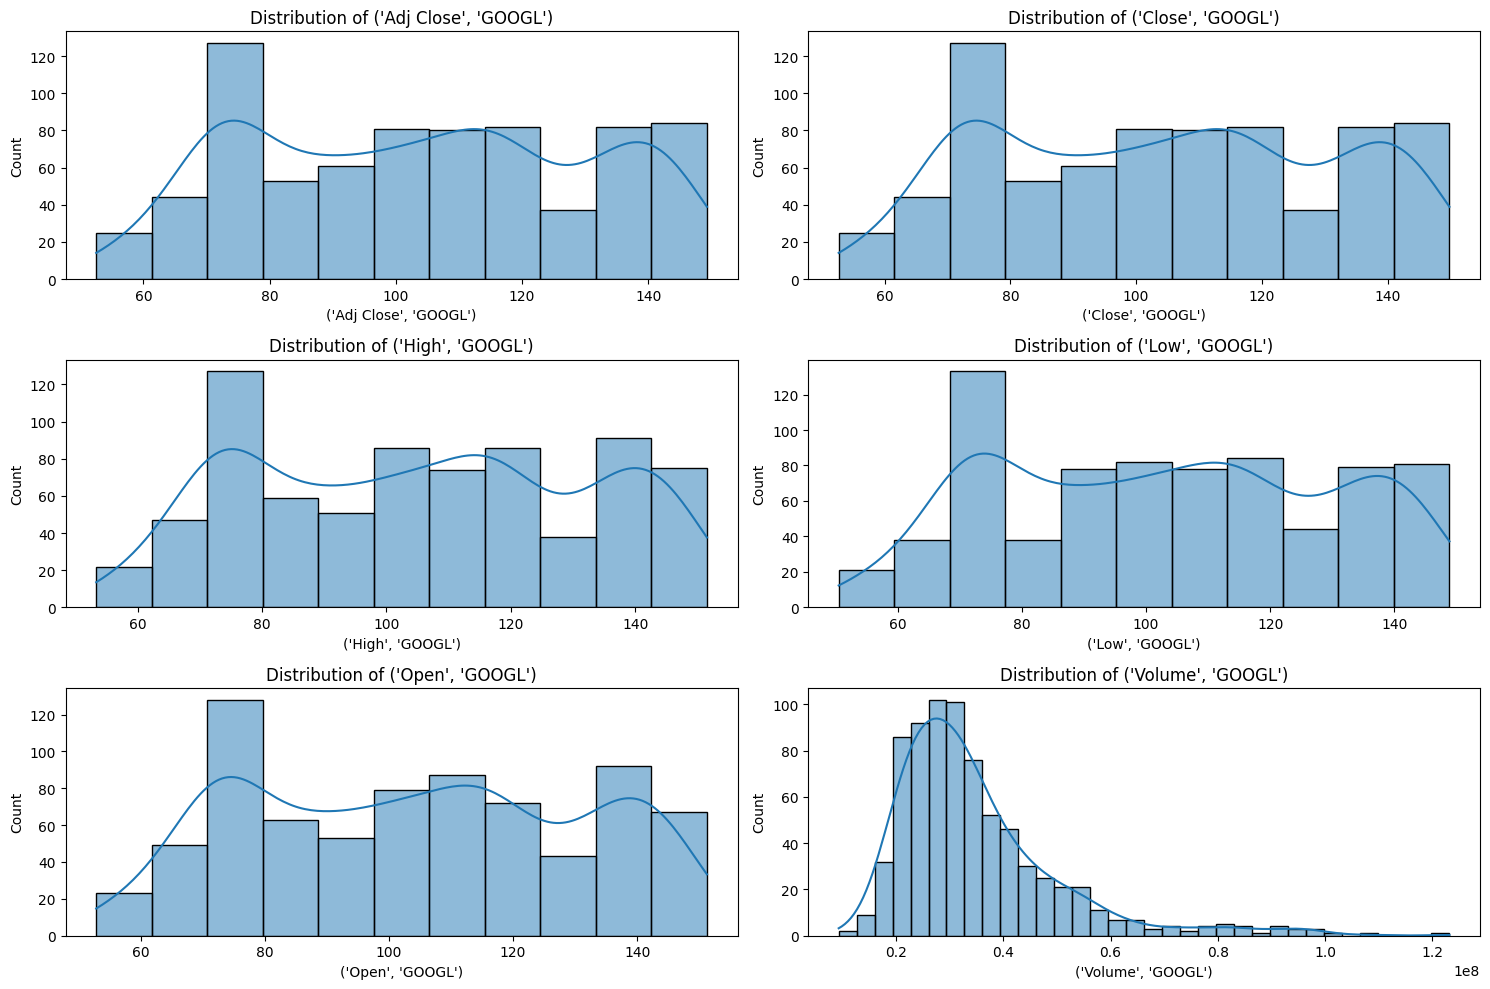

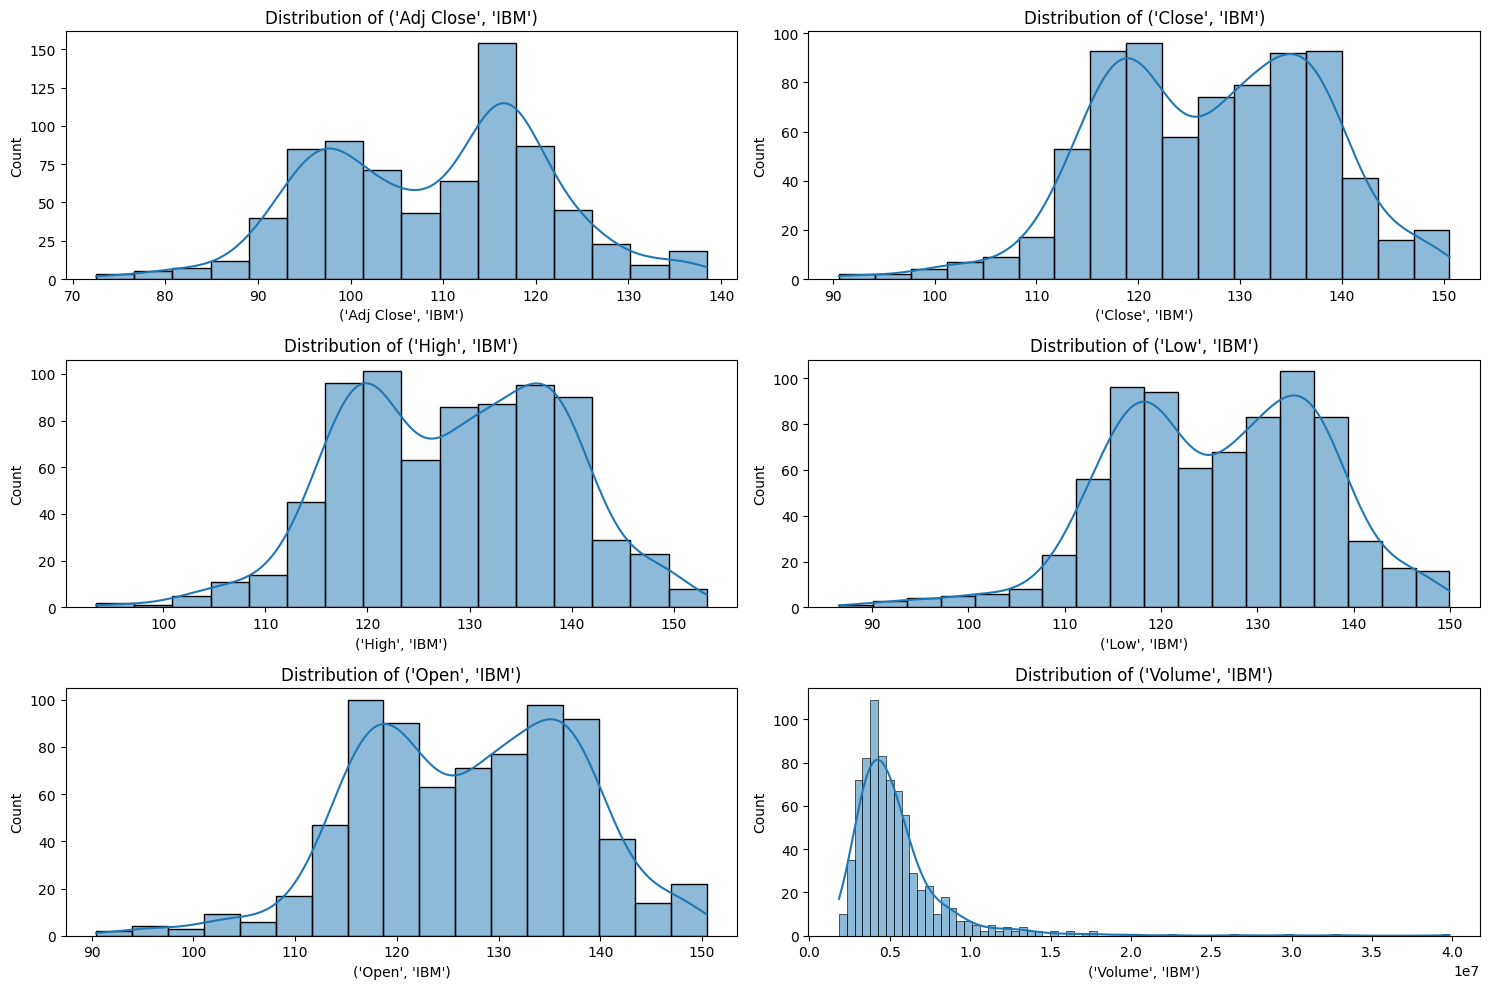

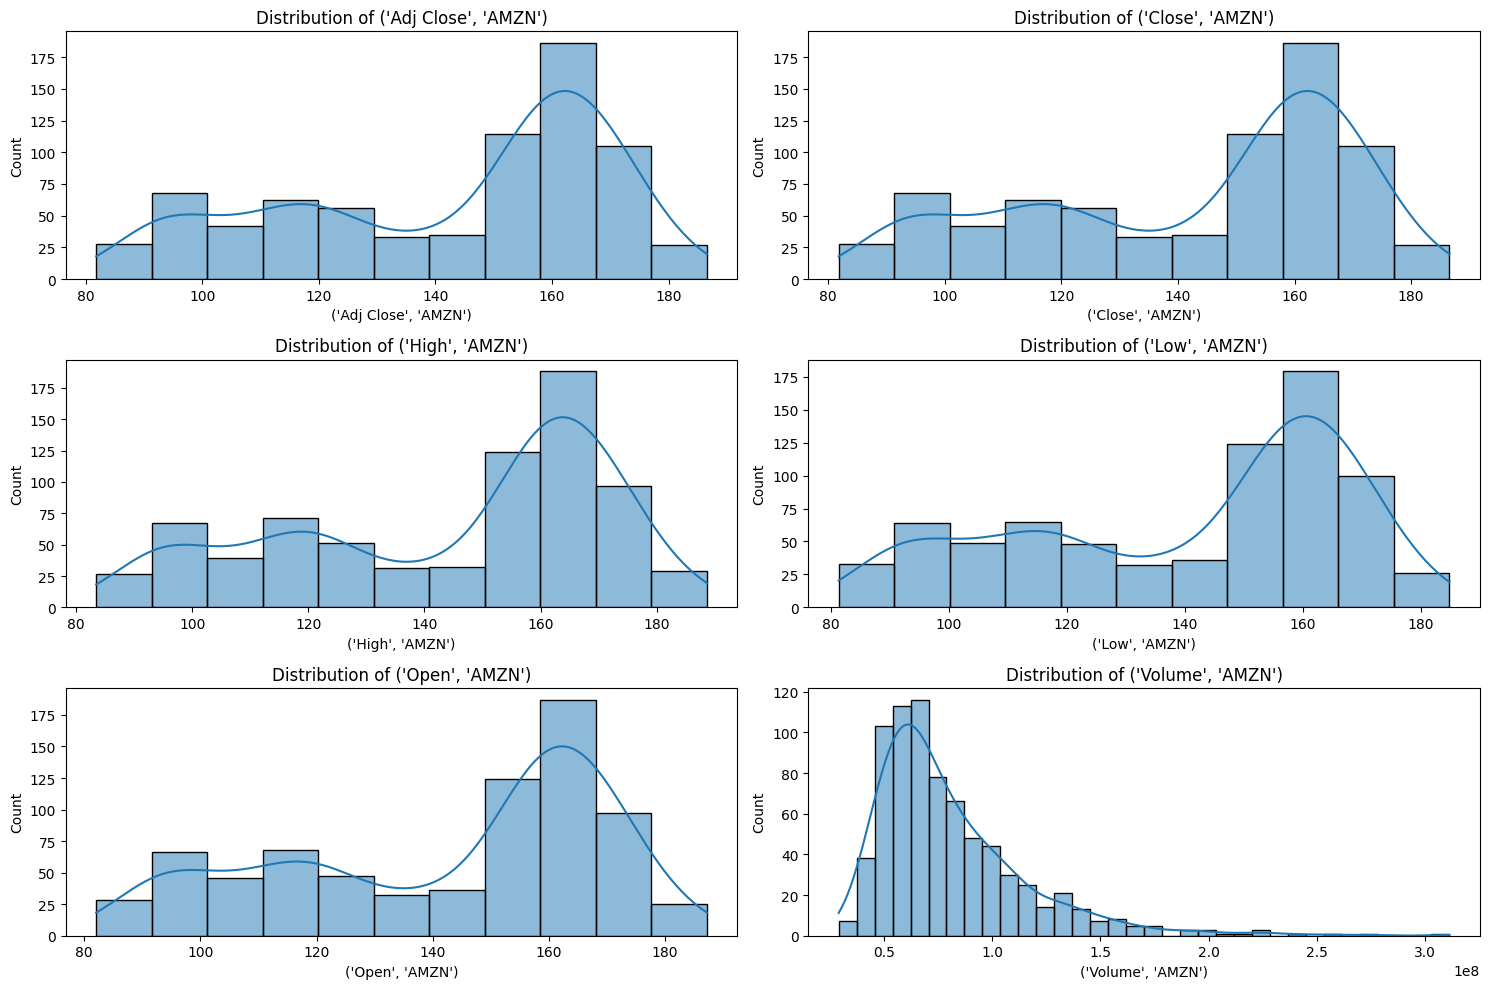

In [9]:
print(analyze_data_quality(aapl_data))
print(analyze_data_quality(googl_data))
print(analyze_data_quality(IBM_data))
print(analyze_data_quality(amzn_data))

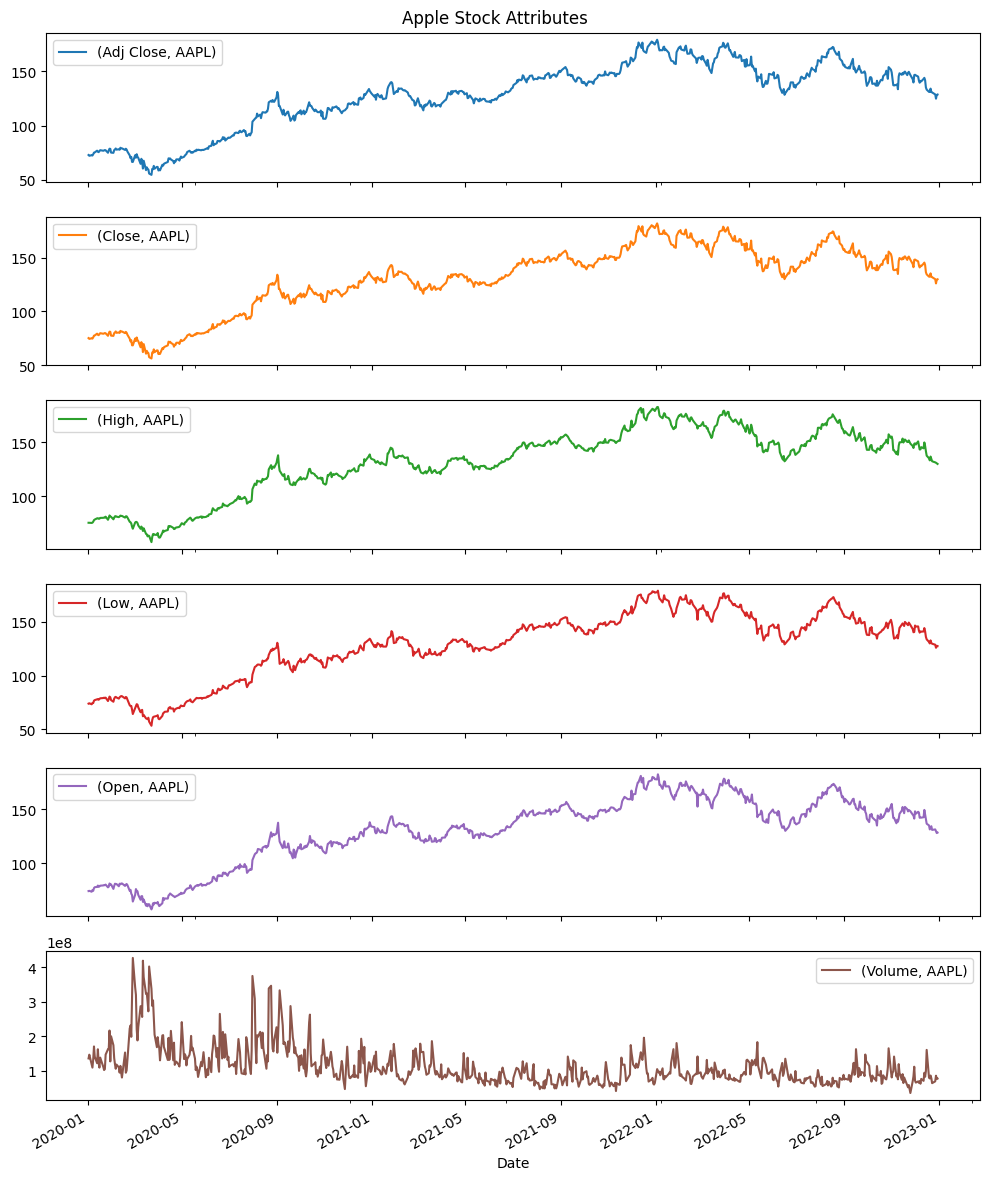

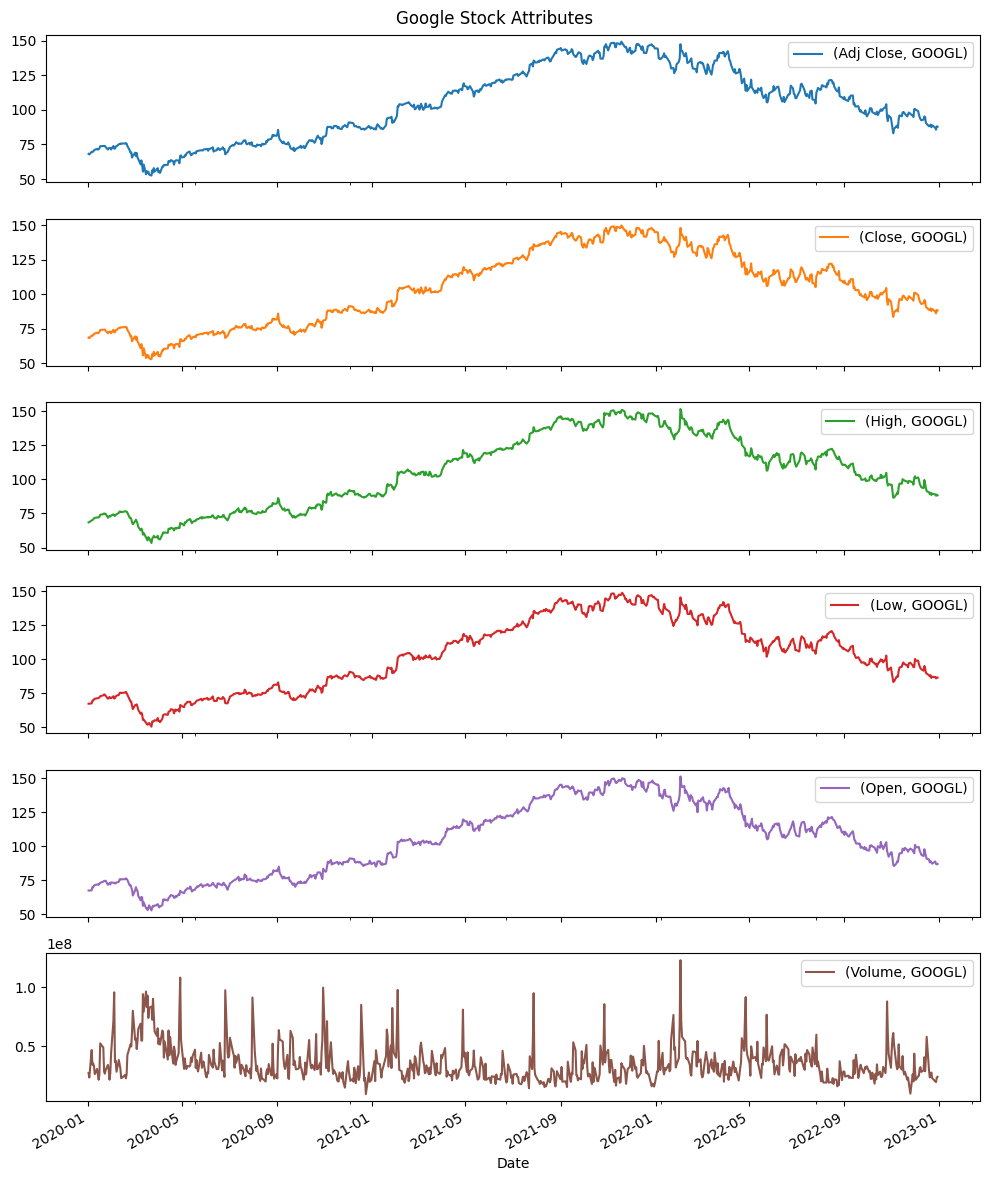

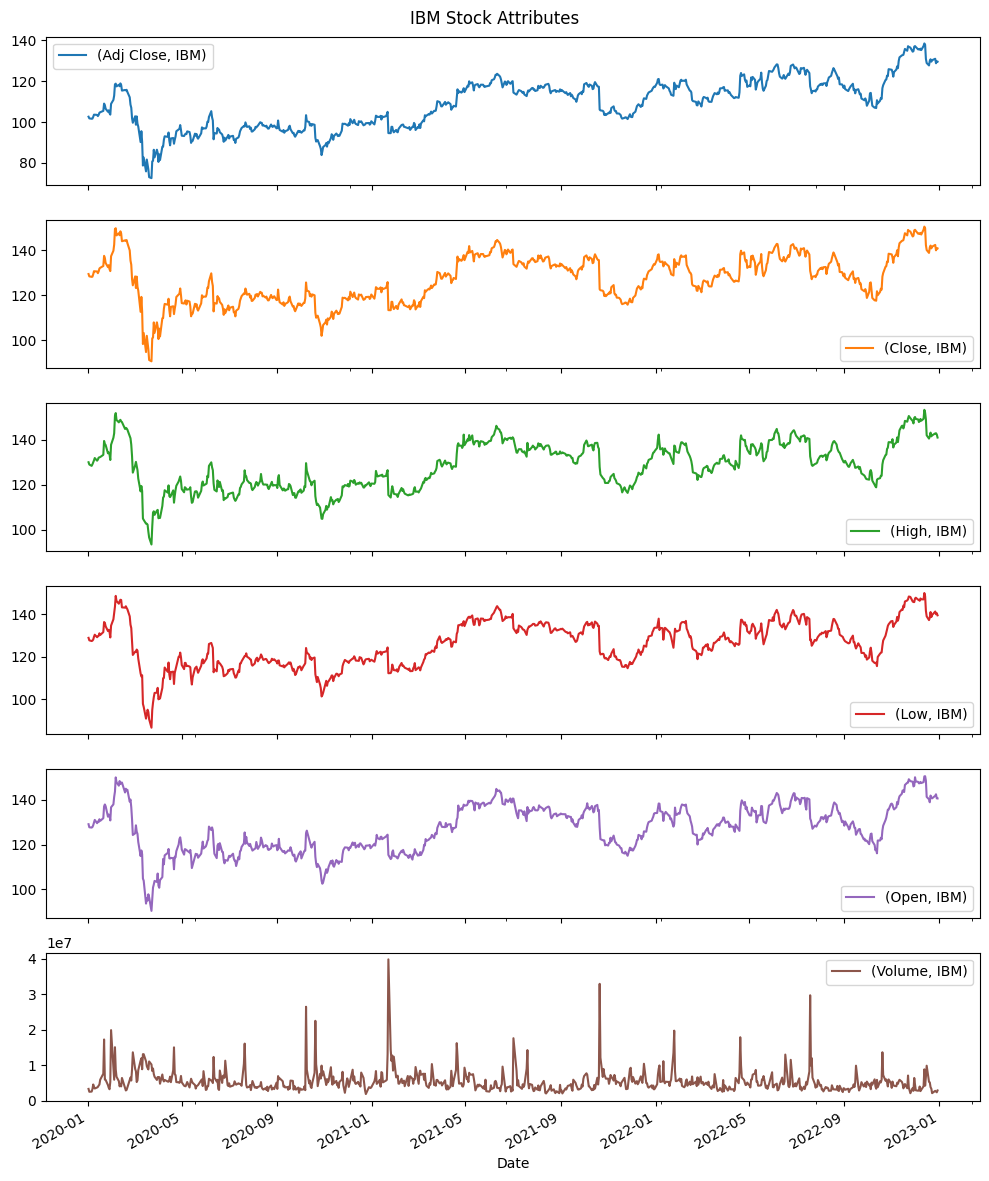

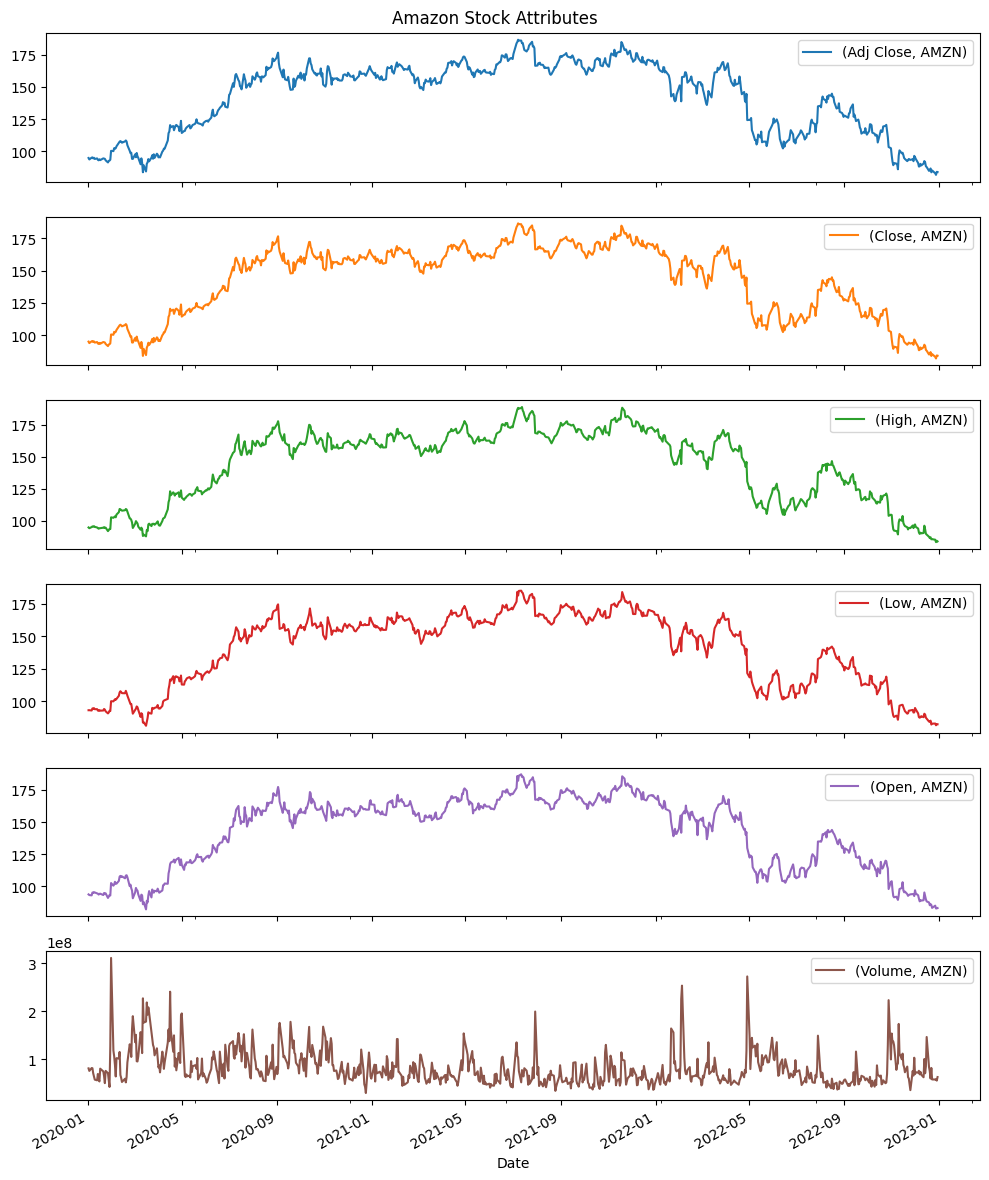

In [10]:
import matplotlib.pyplot as plt

# Plot AAPL data
aapl_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Apple Stock Attributes")  # Add a title for the entire figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot GOOGL data
googl_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Google Stock Attributes")
plt.tight_layout()
plt.show()

# Plot IBM data
IBM_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("IBM Stock Attributes")
plt.tight_layout()
plt.show()

# Plot AMZN data
amzn_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Amazon Stock Attributes")
plt.tight_layout()
plt.show()

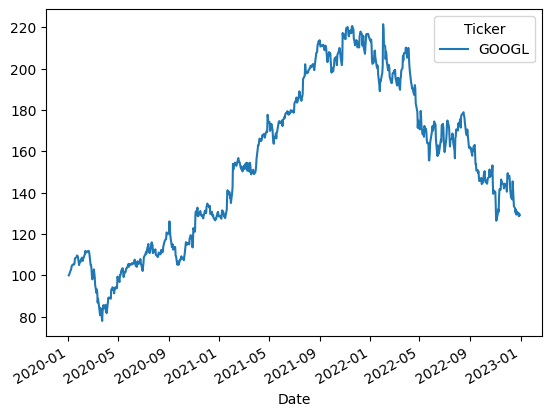

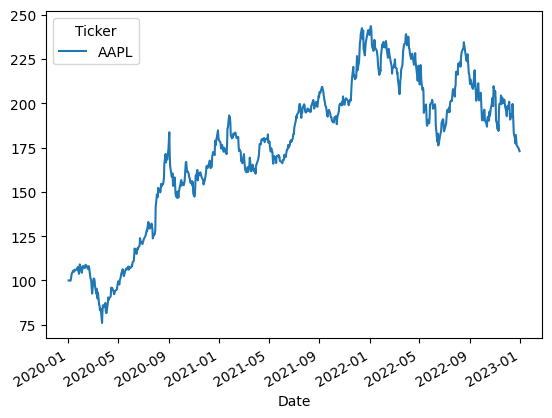

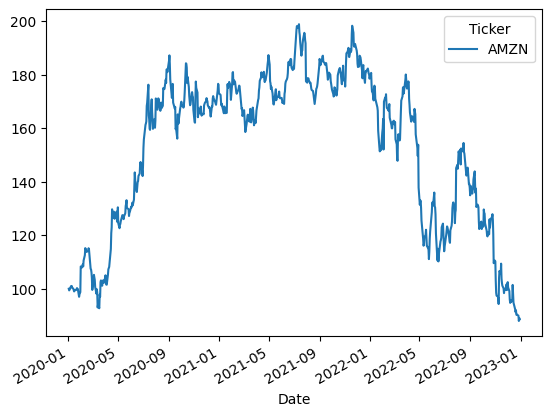

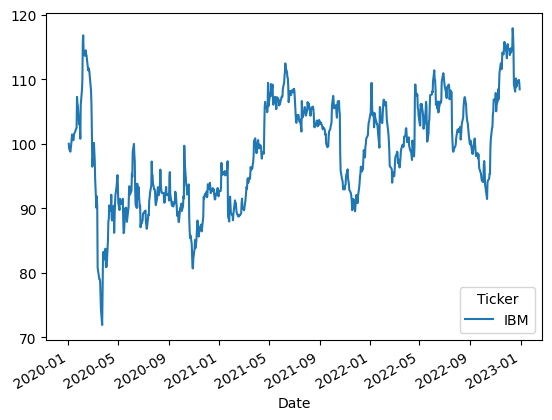

In [11]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = googl_data.High.div(googl_data.High.iloc[0]).mul(100)
normalized_apple = aapl_data.High.div(aapl_data.High.iloc[0]).mul(100)
normalized_amazon = amzn_data.High.div(amzn_data.High.iloc[0]).mul(100)
normalized_ibm = IBM_data.High.div(IBM_data.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_apple.plot()
normalized_amazon.plot()
normalized_ibm.plot()
plt.show()


Analyzing outliers for Google:

Outlier Statistics:

('Adj Close', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.06
Upper bound: 199.40

('Close', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.08
Upper bound: 200.13

('High', 'GOOGL'):
Number of outliers: 0
Lower bound: 4.70
Upper bound: 203.35

('Low', 'GOOGL'):
Number of outliers: 0
Lower bound: 3.52
Upper bound: 199.58

('Open', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.01
Upper bound: 200.31

('Volume', 'GOOGL'):
Number of outliers: 42
Lower bound: 2111750.00
Upper bound: 63209750.00

Generating box plots...


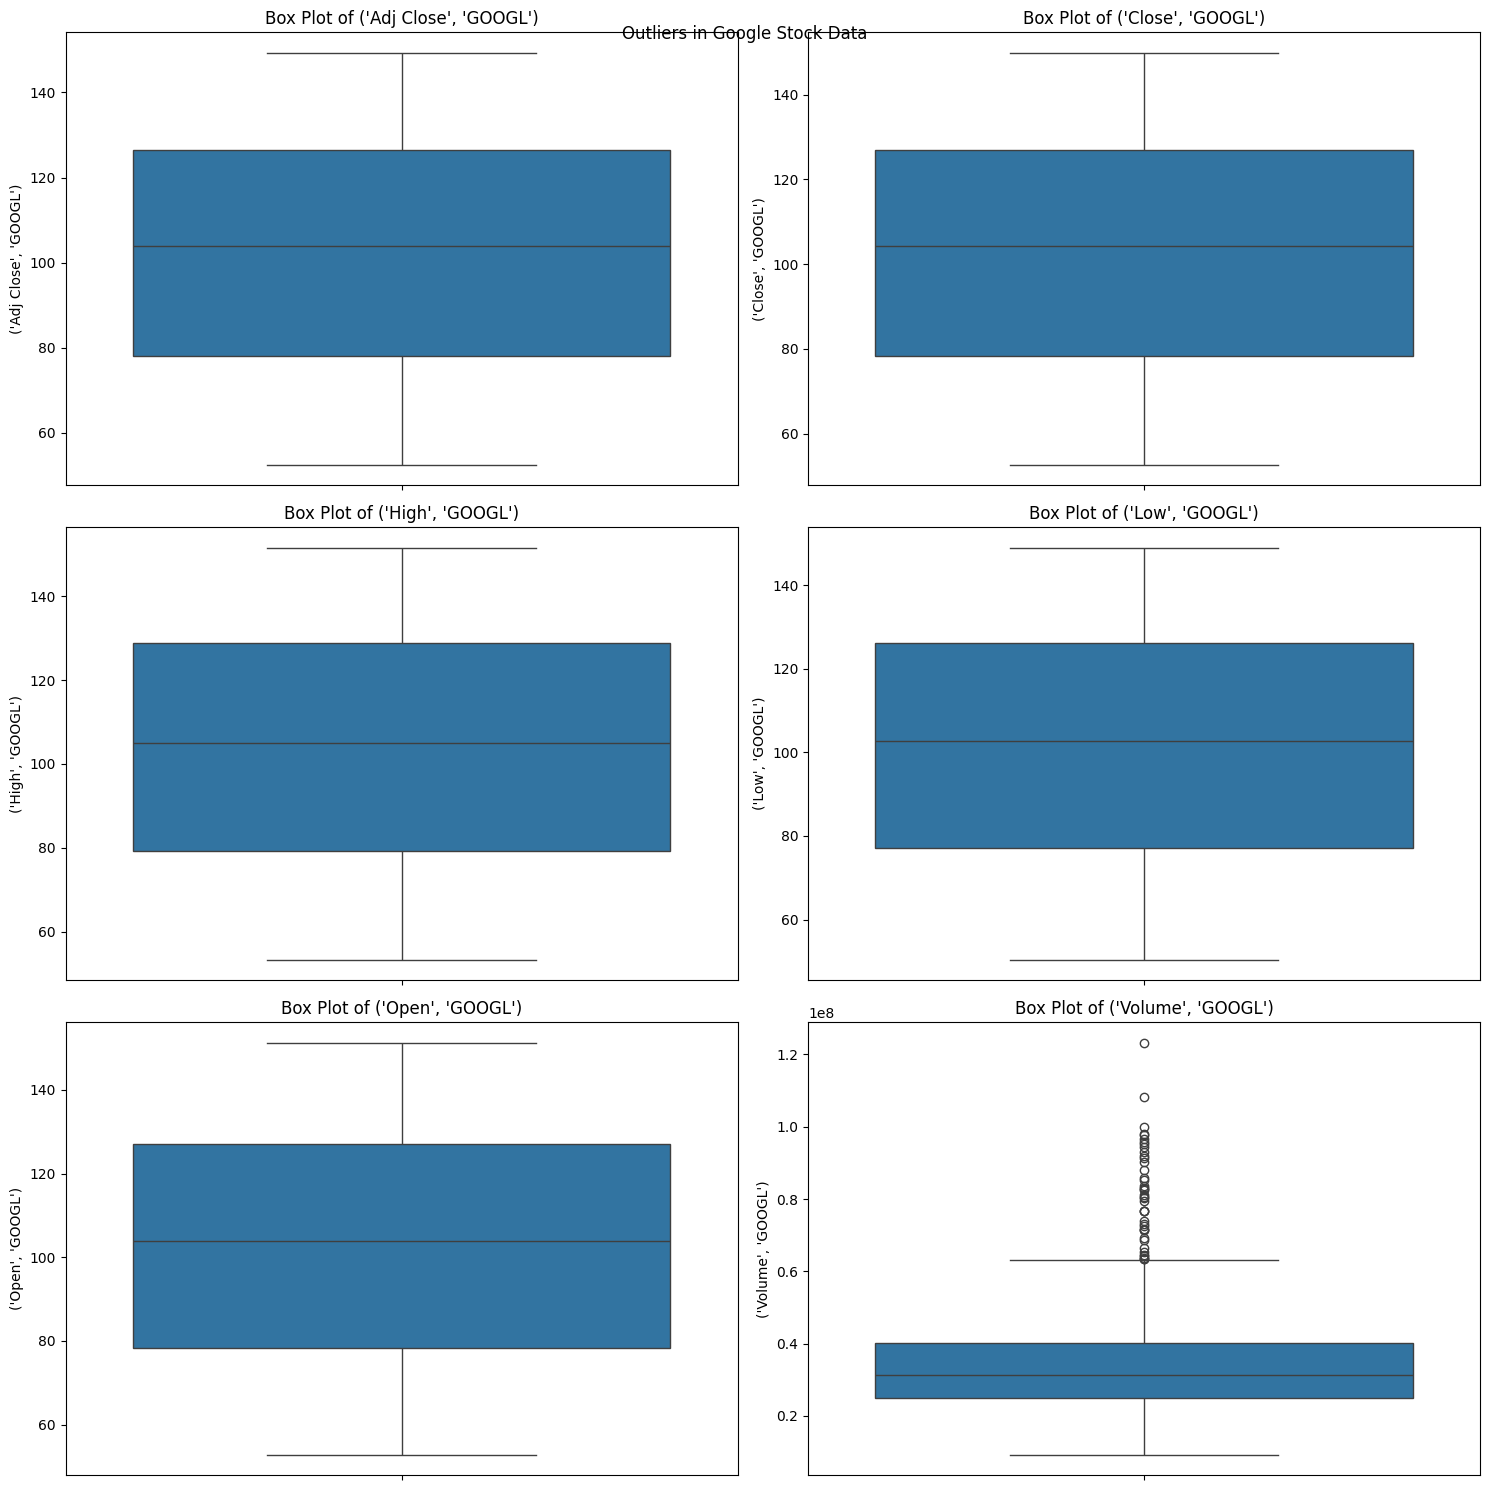


Handling outliers...

Outlier Count Comparison (Before -> After):
('Adj Close', 'GOOGL'): 0 -> 0
('Close', 'GOOGL'): 0 -> 0
('High', 'GOOGL'): 0 -> 0
('Low', 'GOOGL'): 0 -> 0
('Open', 'GOOGL'): 0 -> 0
('Volume', 'GOOGL'): 42 -> 0


In [12]:
print(f"\nAnalyzing outliers for Google:")
# Detect outliers using IQR method
outliers = detect_outliers(googl_data, method='iqr', threshold=1.5)
# Print outlier statistics
print("\nOutlier Statistics:")
for column, stats in outliers.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower bound: {stats['lower_bound']:.2f}")
        print(f"Upper bound: {stats['upper_bound']:.2f}")
# Visualize outliers using box plots
print("\nGenerating box plots...")
plot_outliers(googl_data)
plt.suptitle(f'Outliers in Google Stock Data')
plt.show()

# Handle outliers using clipping method
print("\nHandling outliers...")
googl_data = handle_outliers(googl_data, method='clip')
# Verify outlier handling
outliers_after = detect_outliers(googl_data, method='iqr', threshold=1.5)
    
# Compare before and after
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")


Analyzing outliers for Apple:

Outlier Statistics:

('Adj Close', 'AAPL'):
Number of outliers: 7
Lower bound: 59.58
Upper bound: 201.98

('Close', 'AAPL'):
Number of outliers: 13
Lower bound: 63.29
Upper bound: 203.15

('High', 'AAPL'):
Number of outliers: 14
Lower bound: 65.33
Upper bound: 203.84

('Low', 'AAPL'):
Number of outliers: 13
Lower bound: 61.78
Upper bound: 201.38

('Open', 'AAPL'):
Number of outliers: 18
Lower bound: 64.42
Upper bound: 201.76

('Volume', 'AAPL'):
Number of outliers: 41
Lower bound: -3537300.00
Upper bound: 209534700.00

Generating box plots...


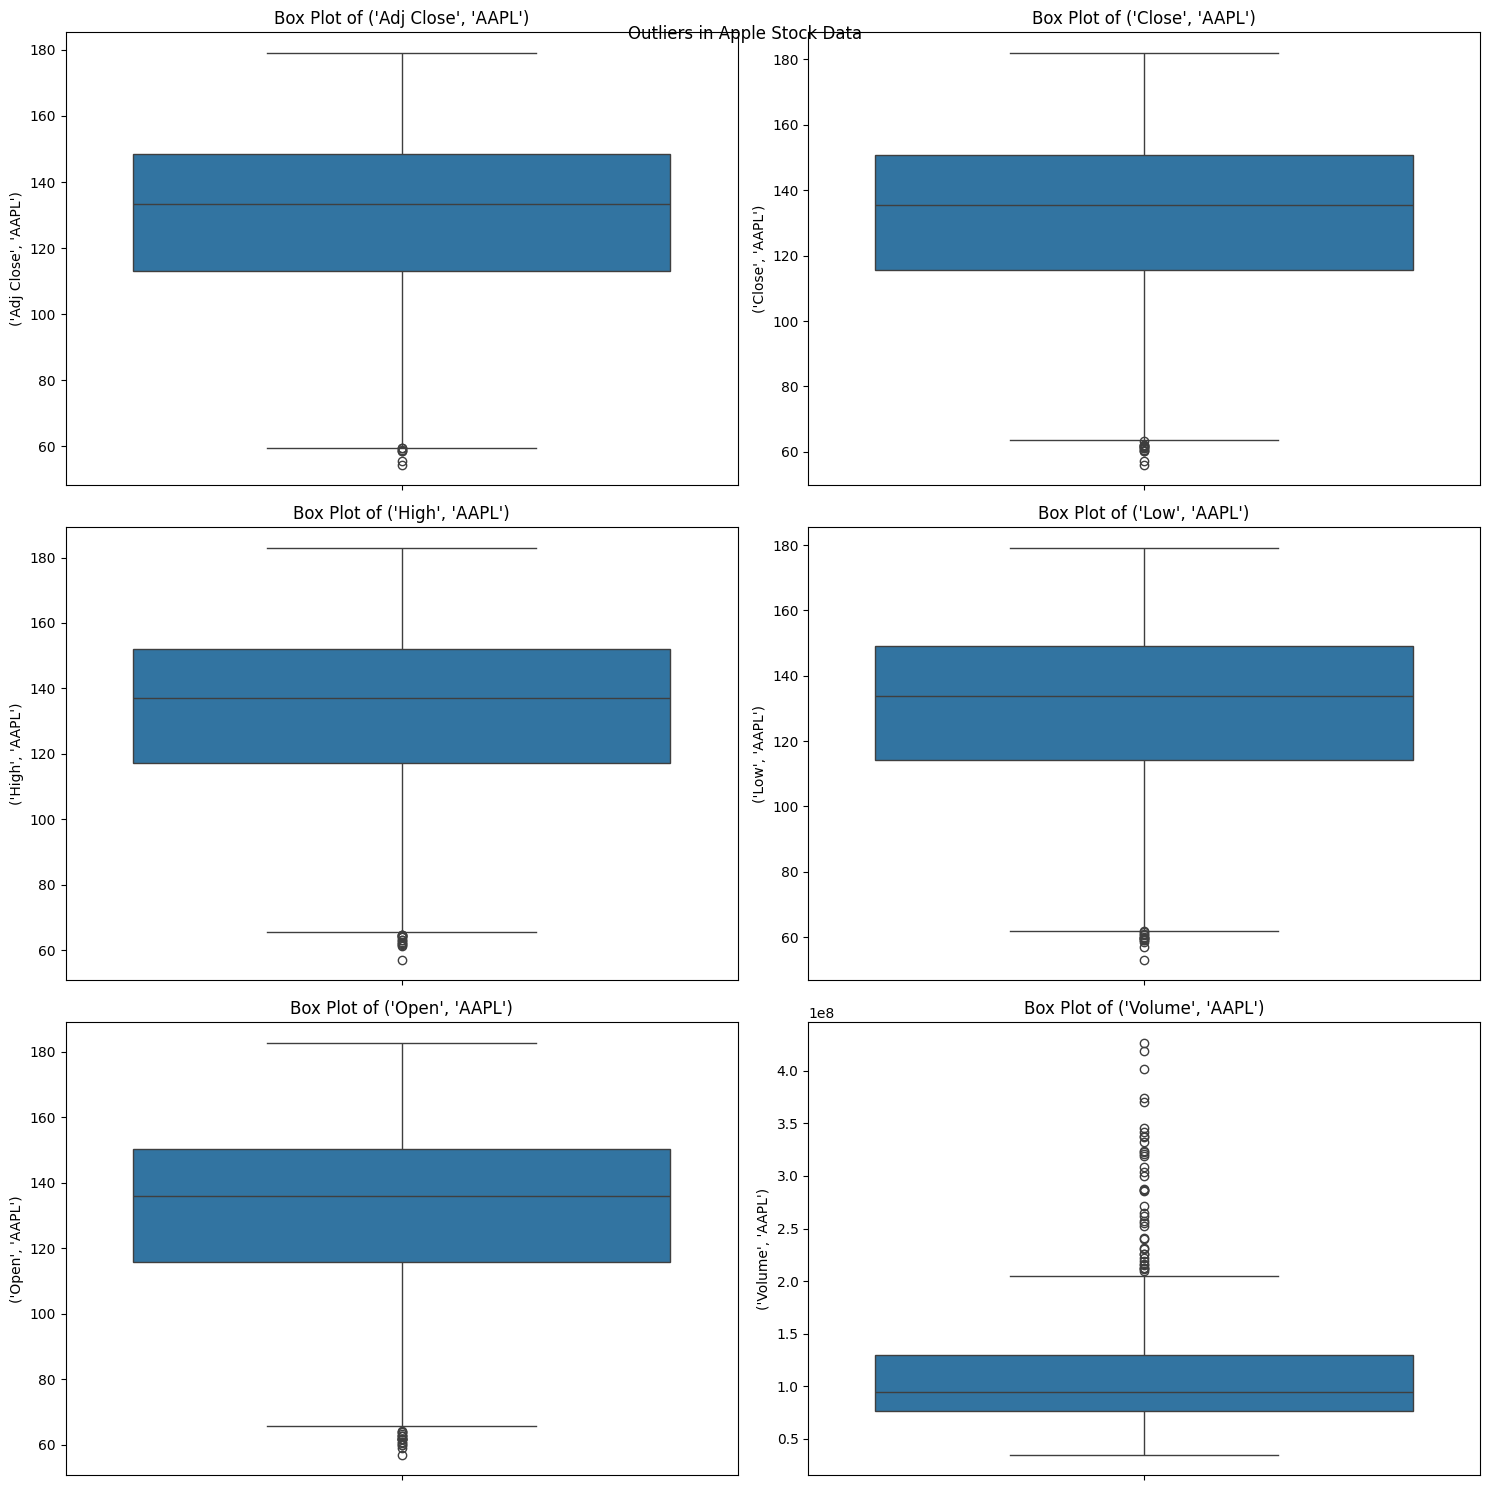


Handling outliers...

Outlier Count Comparison (Before -> After):
('Adj Close', 'AAPL'): 7 -> 0
('Close', 'AAPL'): 13 -> 0
('High', 'AAPL'): 14 -> 0
('Low', 'AAPL'): 13 -> 0
('Open', 'AAPL'): 18 -> 0
('Volume', 'AAPL'): 41 -> 0


In [13]:
print(f"\nAnalyzing outliers for Apple:")
# Detect outliers using IQR method
outliers = detect_outliers(aapl_data, method='iqr', threshold=1.5)
# Print outlier statistics
print("\nOutlier Statistics:")
for column, stats in outliers.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower bound: {stats['lower_bound']:.2f}")
        print(f"Upper bound: {stats['upper_bound']:.2f}")
# Visualize outliers using box plots
print("\nGenerating box plots...")
plot_outliers(aapl_data)
plt.suptitle(f'Outliers in Apple Stock Data')
plt.show()

# Handle outliers using clipping method
print("\nHandling outliers...")
aapl_data = handle_outliers(aapl_data, method='clip')
# Verify outlier handling
outliers_after = detect_outliers(aapl_data, method='iqr', threshold=1.5)
    
# Compare before and after
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")

Analyzin Outliers for the IBM Stock Data

('Adj Close', 'IBM')
 Number of Outliers : 0
 Lower Bound : 69.64
 Upper Bound : 146.58

('Close', 'IBM')
 Number of Outliers : 2
 Lower Bound : 93.77
 Upper Bound : 160.68

('High', 'IBM')
 Number of Outliers : 1
 Lower Bound : 94.33
 Upper Bound : 162.73

('Low', 'IBM')
 Number of Outliers : 3
 Lower Bound : 92.79
 Upper Bound : 159.64

('Open', 'IBM')
 Number of Outliers : 1
 Lower Bound : 93.49
 Upper Bound : 160.79

('Volume', 'IBM')
 Number of Outliers : 52
 Lower Bound : 376201.38
 Upper Bound : 9340508.38

 Plotting Outliers


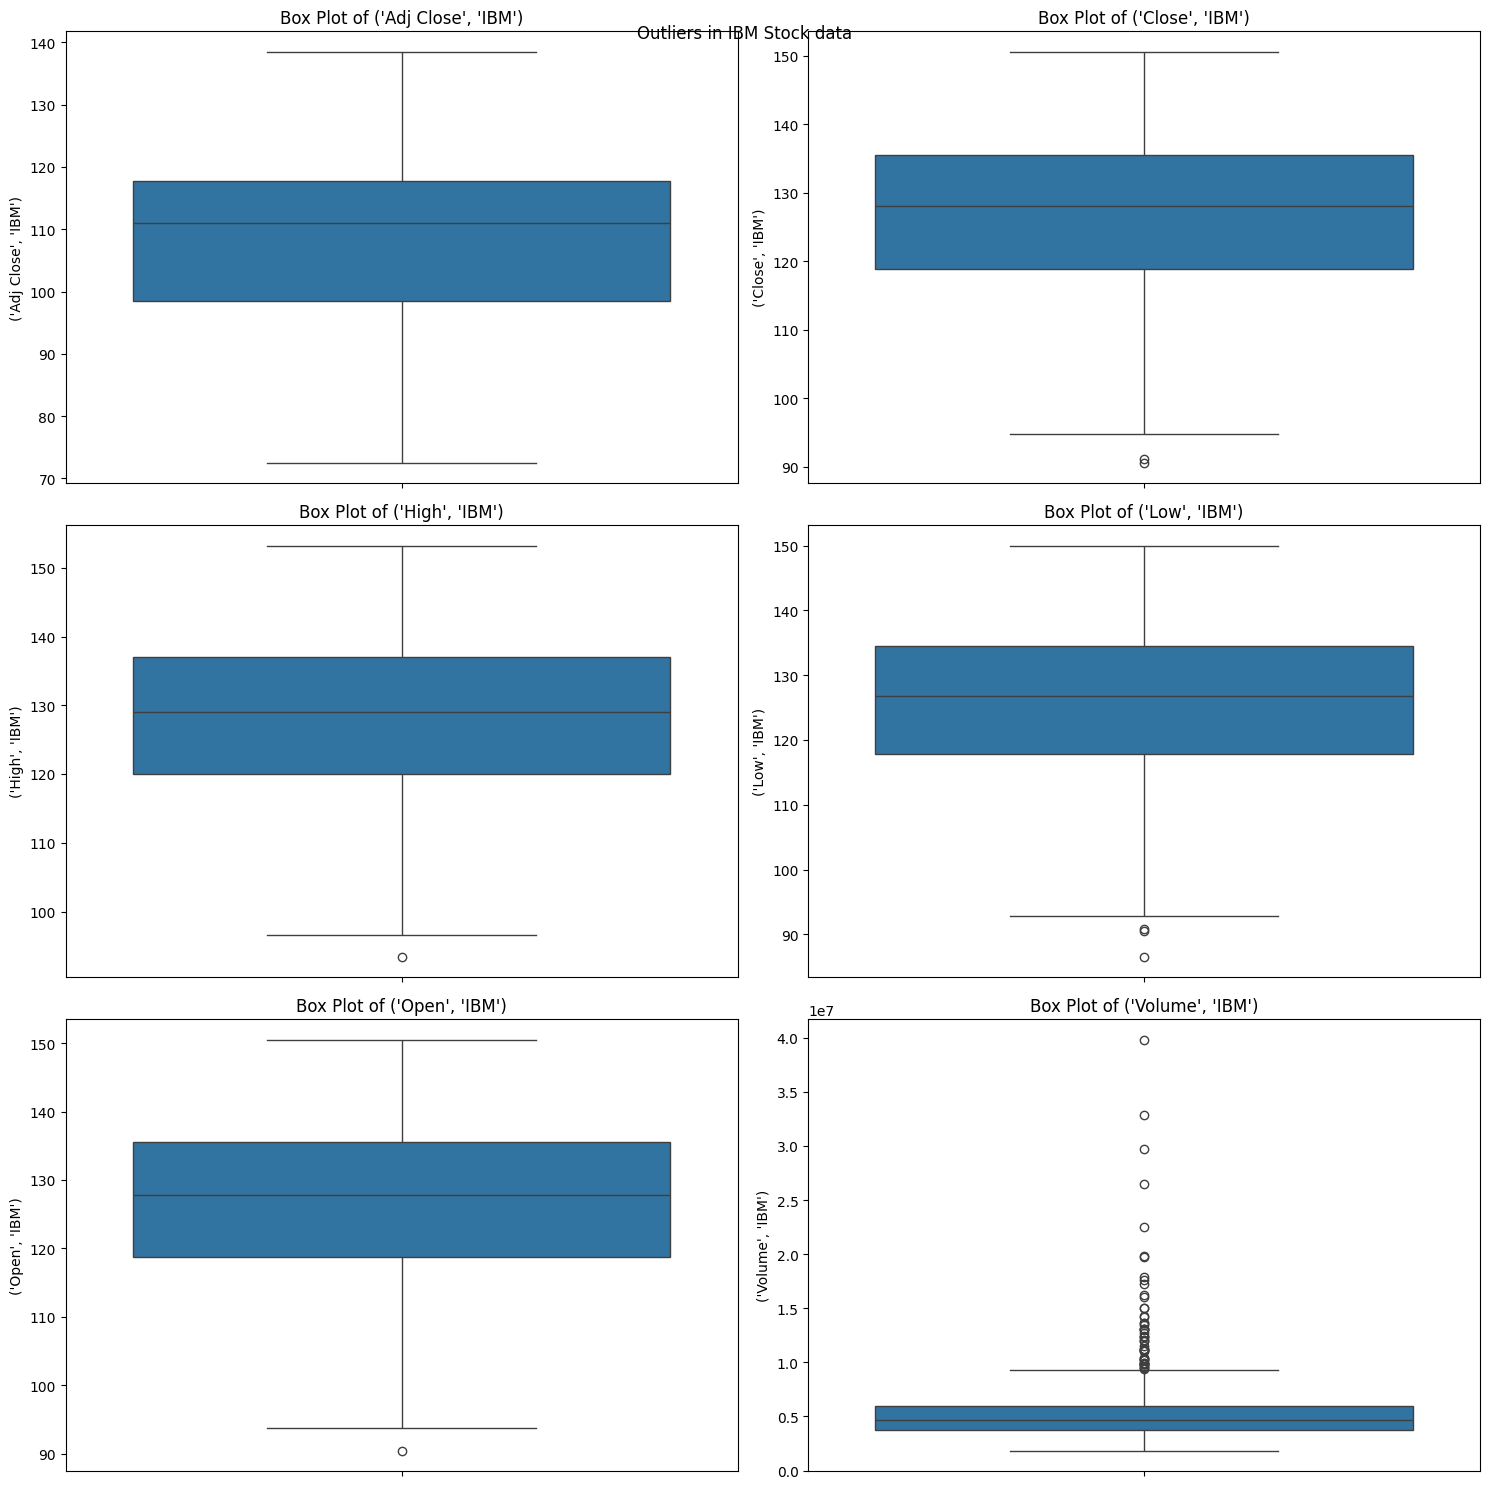


 Handling Outliers

Outlier Count Comparison (Before -> After):
('Adj Close', 'IBM'): 0 -> 0
('Close', 'IBM'): 2 -> 0
('High', 'IBM'): 1 -> 0
('Low', 'IBM'): 3 -> 0
('Open', 'IBM'): 1 -> 0
('Volume', 'IBM'): 52 -> 0


In [14]:
print("Analyzin Outliers for the IBM Stock Data")
outliers=detect_outliers(IBM_data,method='iqr',threshold=1.5)
for column,stats in outliers.items():
    print(f"\n{column}")
    print(f" Number of Outliers : {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f" Lower Bound : {stats['lower_bound']:.2f}")
        print(f" Upper Bound : {stats['upper_bound']:.2f}")
print("\n Plotting Outliers")
plot_outliers(IBM_data)
plt.suptitle("Outliers in IBM Stock data")
plt.show()
print("\n Handling Outliers")
IBM_data=handle_outliers(IBM_data,method='clip')
outliers_after=detect_outliers(IBM_data,method='iqr',threshold=1.5)
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")



 Outlier Analysis of Amazon Stock Data
('Adj Close', 'AMZN')
No of Outliers : 0
Lower Bound 48.89
Upper Bound 234.08
('Close', 'AMZN')
No of Outliers : 0
Lower Bound 48.89
Upper Bound 234.08
('High', 'AMZN')
No of Outliers : 0
Lower Bound 49.73
Upper Bound 236.25
('Low', 'AMZN')
No of Outliers : 0
Lower Bound 45.75
Upper Bound 233.28
('Open', 'AMZN')
No of Outliers : 0
Lower Bound 48.86
Upper Bound 234.31
('Volume', 'AMZN')
No of Outliers : 35
Lower Bound 170750.00
Upper Bound 151944750.00
Plot Outliers


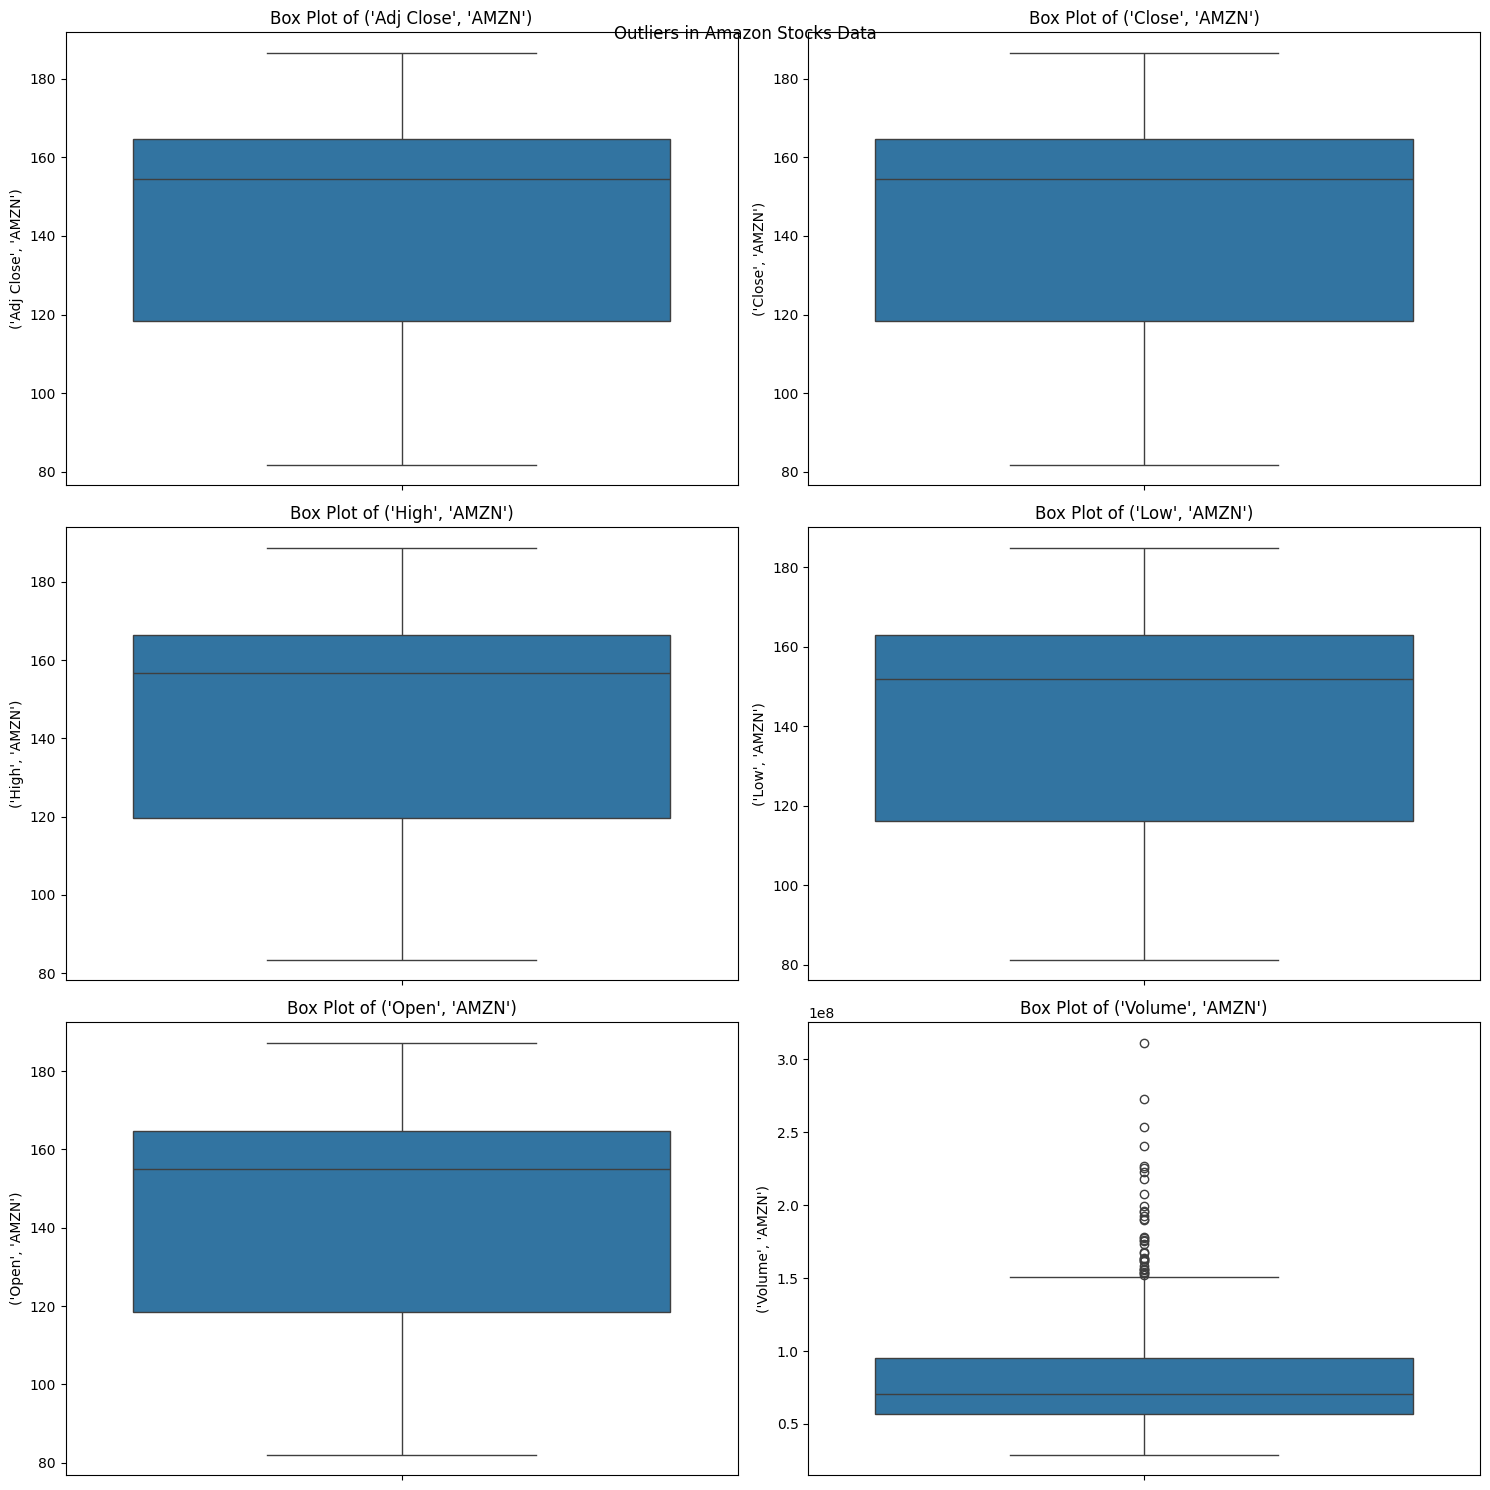


 handling Outliers...
Comparing Outliers (Before -> After)
('Adj Close', 'AMZN') 0->0
('Close', 'AMZN') 0->0
('High', 'AMZN') 0->0
('Low', 'AMZN') 0->0
('Open', 'AMZN') 0->0
('Volume', 'AMZN') 35->0


In [15]:
print("\n Outlier Analysis of Amazon Stock Data")
outliers=detect_outliers(amzn_data,method='iqr',threshold=1.5)
for column,stats in outliers.items():
    print(f"{column}")
    print(f"No of Outliers : {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower Bound {stats['lower_bound']:.2f}")
        print(f"Upper Bound {stats['upper_bound']:.2f}")
print("Plot Outliers")
plot_outliers(amzn_data)
plt.suptitle('Outliers in Amazon Stocks Data')
plt.show()
print("\n handling Outliers...")
amzn_data=handle_outliers(amzn_data,method='clip')
outliers_after=detect_outliers(amzn_data,method='iqr',threshold=1.5)
print("Comparing Outliers (Before -> After)")
for column in outliers.keys():
    before_count=outliers[column]['outlier_count']
    after_count=outliers_after[column]['outlier_count']
    print(f"{column} {before_count}->{after_count}")


***LSTM - [Long Short Term  ]***

In [16]:
from data_preprocessing import predict_stock_prices_lstm


***For Google Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2681 - val_loss: 0.0279
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0290 - val_loss: 0.0056
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0174 - val_loss: 0.0052
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0104 - val_loss: 0.0058
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0088 - val_loss: 0.0100
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0086 - val_loss: 0.0054
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0081 - val_loss: 0.0091
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0

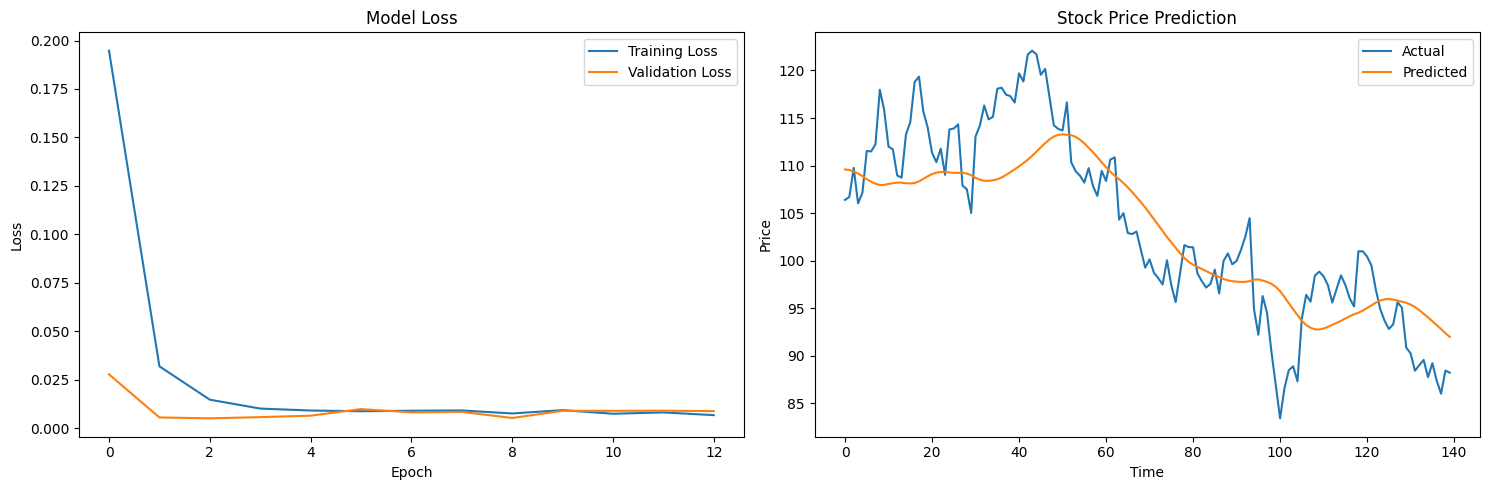


Model Performance Metrics:
MSE: 27.1171
RMSE: 5.2074
MAE: 4.3881
R2: 0.7172


In [17]:
results_googl_lstm = predict_stock_prices_lstm(
    googl_data,                    # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
)

***For Apple Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2599 - val_loss: 0.1230
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0271 - val_loss: 0.0096
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0102 - val_loss: 0.0048
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0092 - val_loss: 0.0066
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0075 - val_loss: 0.0051
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0081 - val_loss: 0.0047
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0080 - val_loss: 0.0047
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0081 - val_loss: 0.0064
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0071 - val_loss: 0.0048
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0072 - val_loss: 0.0047
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0

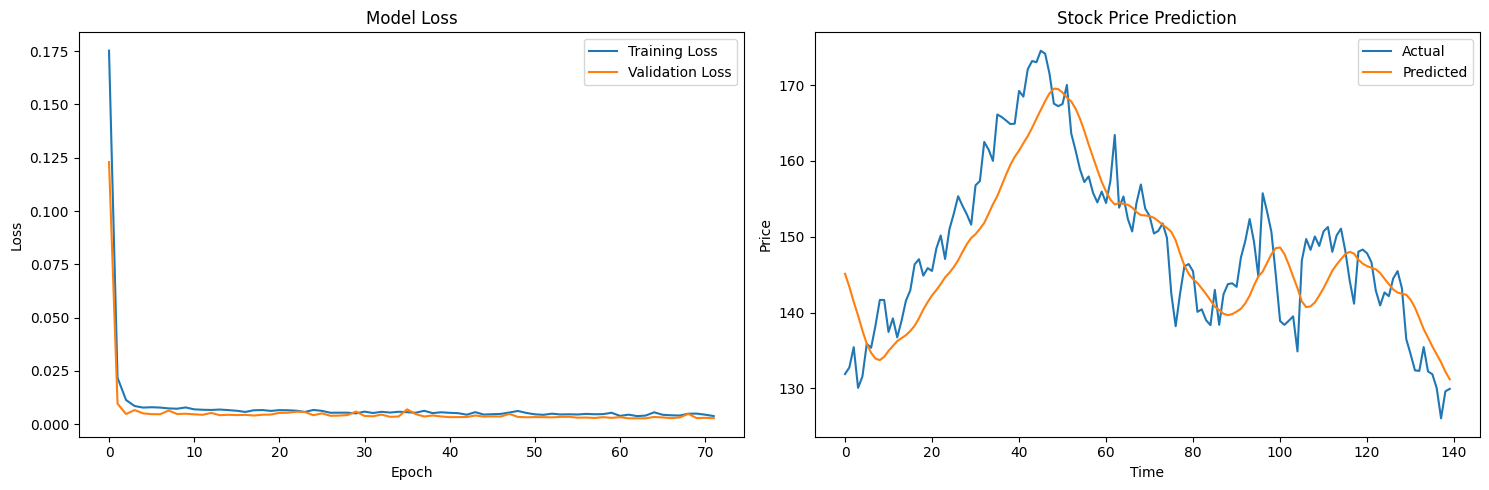


Model Performance Metrics:
MSE: 31.6887
RMSE: 5.6293
MAE: 4.7683
R2: 0.7380


In [18]:
result_aapl_lstm=predict_stock_prices_lstm(
    aapl_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For IBM Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2941 - val_loss: 0.1270
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0385 - val_loss: 0.0391
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0196 - val_loss: 0.0086
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0120 - val_loss: 0.0102
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - val_loss: 0.0077
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0118 - val_loss: 0.0090
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0113 - val_loss: 0.0086
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0111 - val_loss: 0.0056
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0115 - val_loss: 0.0066
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0097 - val_loss: 0.0061
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0

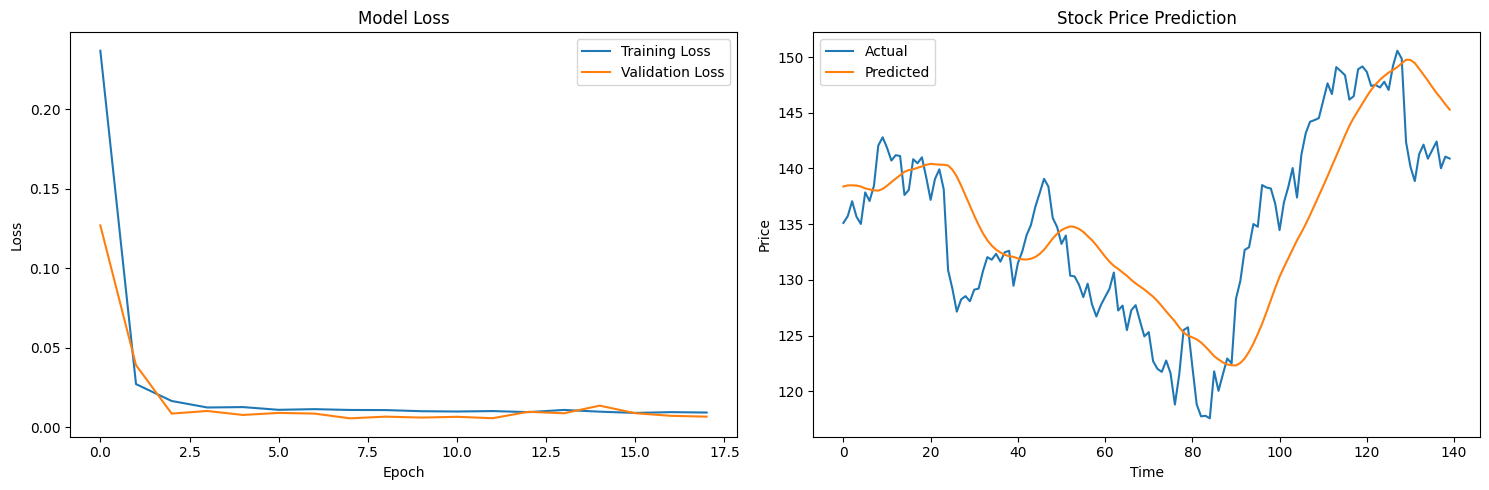


Model Performance Metrics:
MSE: 28.3144
RMSE: 5.3211
MAE: 4.3276
R2: 0.5961


In [19]:
result_ibm_lstm=predict_stock_prices_lstm(
    IBM_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For Amazon Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.4428 - val_loss: 0.0493
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0301 - val_loss: 0.0306
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0168 - val_loss: 0.0210
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0152 - val_loss: 0.0322
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0166 - val_loss: 0.0278
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0123 - val_loss: 0.0241
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0132 - val_loss: 0.0232
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0133 - val_loss: 0.0266
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0125 - val_loss: 0.0260
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - val_loss: 0.0242
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0114 - val_loss: 0.0241
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0

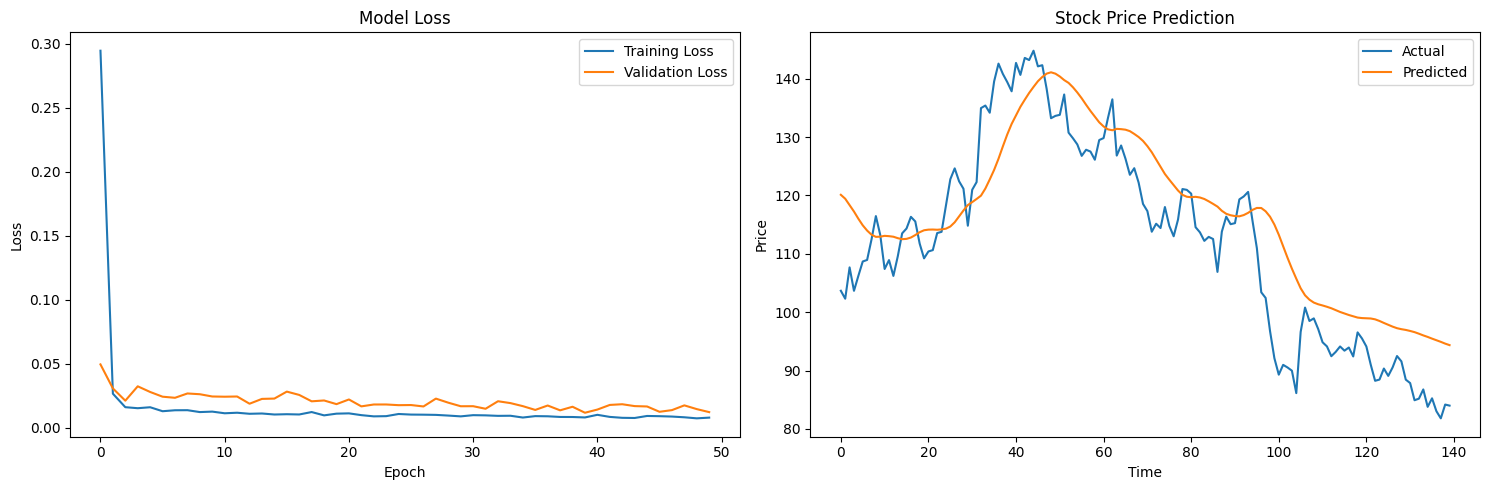


Model Performance Metrics:
MSE: 77.4807
RMSE: 8.8023
MAE: 7.3134
R2: 0.7354


In [20]:
result_amzn_lstm=predict_stock_prices_lstm(
    amzn_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate    
)

***GRU -[Gated Recurrent Unit]***

***For Google Data***

In [21]:
from data_preprocessing import predict_stock_prices_gru

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2702 - val_loss: 0.0757
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0433 - val_loss: 0.0041
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0241 - val_loss: 0.0062
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0156 - val_loss: 0.0026
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - val_loss: 0.0028
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0073 - val_loss: 0.0025
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - val_loss: 0.0036
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0077 - val_loss: 0.0024
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0067 - val_loss: 0.0024
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0071 - val_loss: 0.0025
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0072 - val_loss: 0.0031
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0

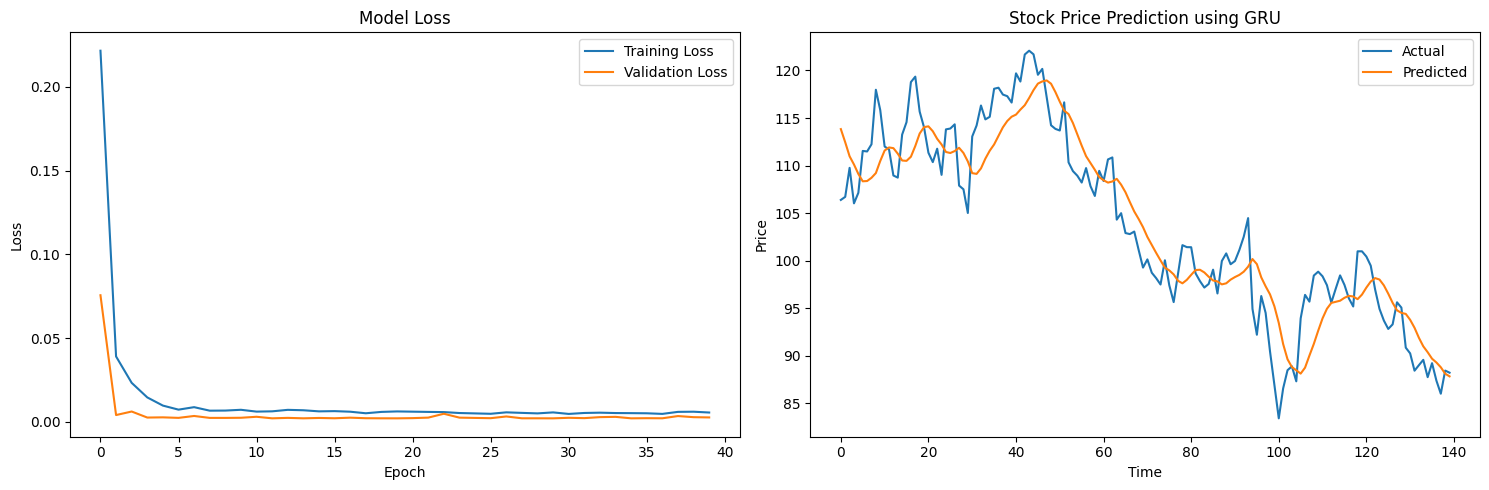


Model Performance Metrics:
MSE: 14.0287
RMSE: 3.7455
MAE: 3.1620
R2: 0.8537


In [38]:
results_googl_gru = predict_stock_prices_gru(
    googl_data,                    # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
)

***For Apple Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.2246 - val_loss: 0.0504
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0242 - val_loss: 0.0061
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0147 - val_loss: 0.0055
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - val_loss: 0.0056
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0106 - val_loss: 0.0023
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0084 - val_loss: 0.0023
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0076 - val_loss: 0.0031
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0069 - val_loss: 0.0028
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0067 - val_loss: 0.0023
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.

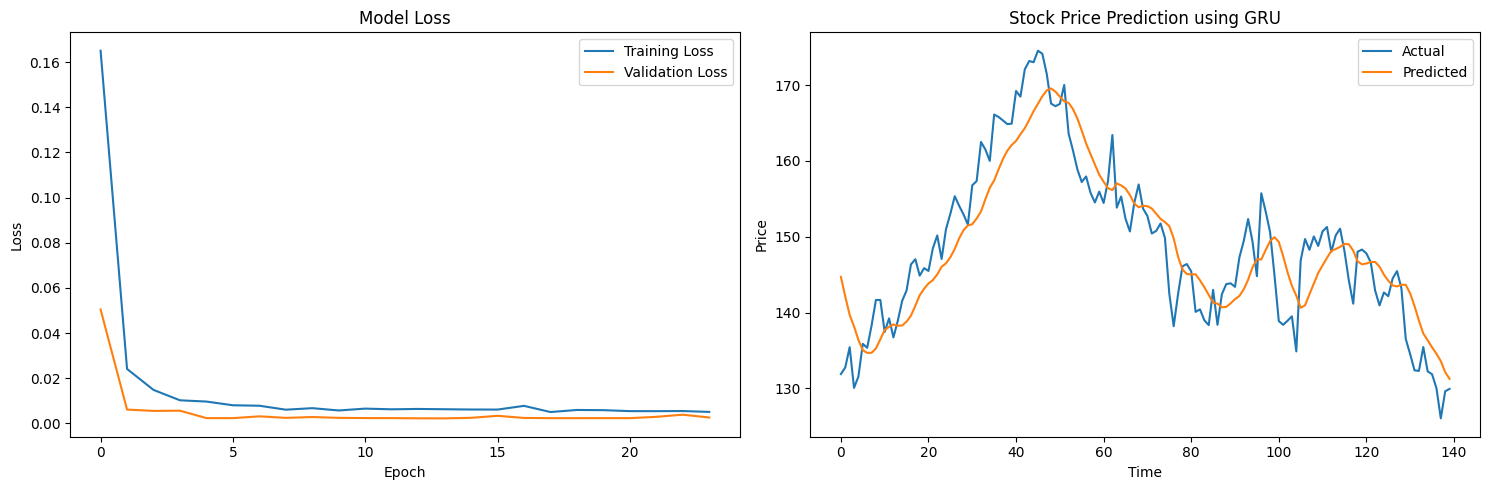


Model Performance Metrics:
MSE: 24.6072
RMSE: 4.9606
MAE: 4.1703
R2: 0.7965


In [47]:
result_aapl_gru=predict_stock_prices_gru(
    aapl_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For IBM Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.2412 - val_loss: 0.0261
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0212 - val_loss: 0.0158
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0151 - val_loss: 0.0112
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0119 - val_loss: 0.0094
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - val_loss: 0.0068
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0095 - val_loss: 0.0058
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0071 - val_loss: 0.0043
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0078 - val_loss: 0.0041
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0079 - val_loss: 0.0053
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - val_loss: 0.0055
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0

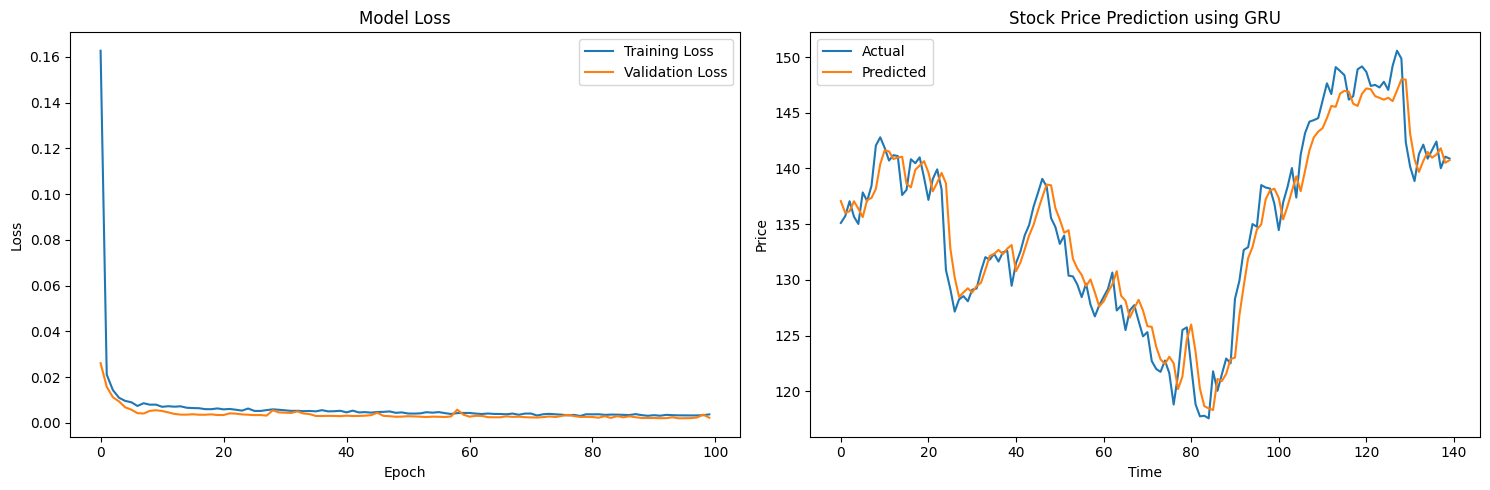


Model Performance Metrics:
MSE: 4.5764
RMSE: 2.1392
MAE: 1.6875
R2: 0.9347


In [24]:
result_ibm_gru=predict_stock_prices_gru(
    IBM_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For Amazon Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.4993 - val_loss: 0.0970
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1347 - val_loss: 0.0955
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0339 - val_loss: 0.0252
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0181 - val_loss: 0.0227
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0120 - val_loss: 0.0104
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0102 - val_loss: 0.0063
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0099 - val_loss: 0.0062
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0087 - val_loss: 0.0070
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0084 - val_loss: 0.0058
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0092 - val_loss: 0.0076
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0

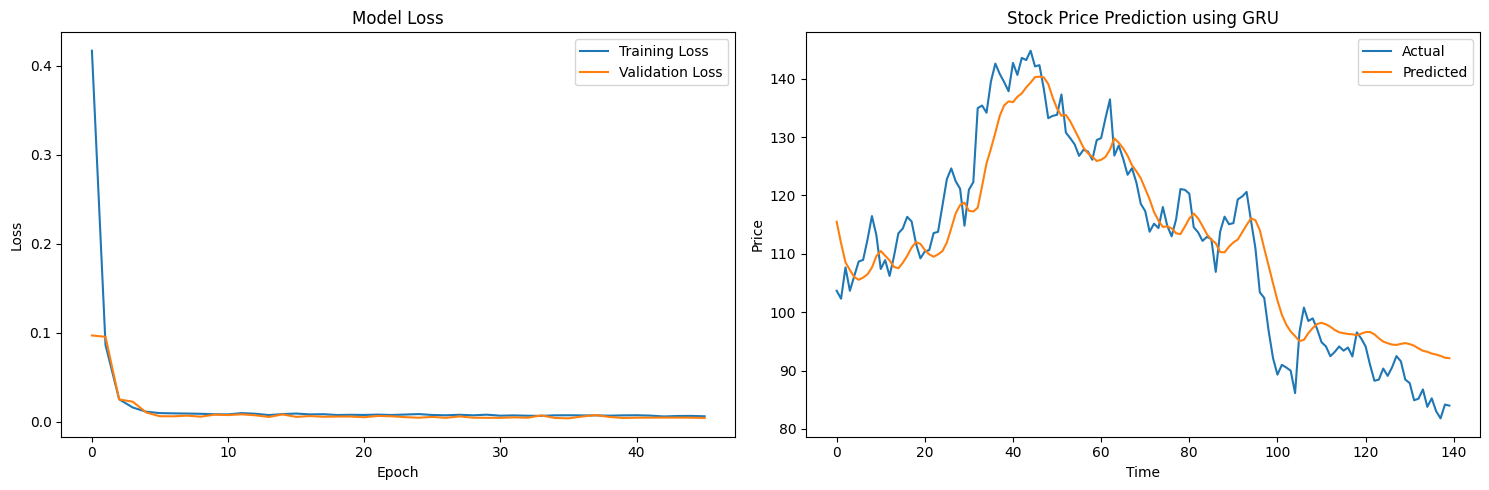


Model Performance Metrics:
MSE: 34.2235
RMSE: 5.8501
MAE: 4.7769
R2: 0.8831


In [55]:
result_amzn_gru=predict_stock_prices_gru(
    amzn_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate    
)